In [1]:
# IMPORTANDO BIBLIOTECAS
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

In [2]:
# nome do arquivo
DB = 'DataBase_Full.txt' 
DB_T = 'DataBase_Full_TranspostosMF.txt' 

df_DB = pd.read_csv(DB,skiprows=0, delimiter=';') 
df_DB_T = pd.read_csv(DB_T,skiprows=0, delimiter=';') 

In [3]:
Freq = df_DB['Frequencia_Hz']
Freq = Freq.drop_duplicates()
Freq = Freq.sort_values(ascending=True)
Freq.head(5)

98    1000
99    1090
97    1188
96    1294
95    1411
Name: Frequencia_Hz, dtype: int64

In [4]:
df_DB.head(5)

,Id_Trilha,isolamento_QualItatIvo,NíveCurtoCirtuito_Qualitativo,EspessuraTrlha_Qualitativo,Isolamento_Quantitativo_mm,EspessuraTrlha__Quantitativo_mm,Frequencia_Hz,absz,phasez_DEG,realz,imagz,R_ACurtoVsAIsolamento,R_ATrilhaVsAIsolamento,Area_CURTO,Area_ISOLAMENTO,Area_TRILHA
0,I1_C3_T3,1,3,3,0.5,0.75,5000000,7381,-62.311108,3429.734,-6535.772,0.005769,0.794919,9204,1595320,1268150
1,I1_C3_T3,1,3,3,0.5,0.75,4587823,8337,-64.055994,3647.350,-7496.830,0.005769,0.794919,9204,1595320,1268150
2,I1_C3_T3,1,3,3,0.5,0.75,4209624,9181,-65.803974,3762.814,-8374.176,0.005769,0.794919,9204,1595320,1268150
3,I1_C3_T3,1,3,3,0.5,0.75,3862602,10076,-67.705735,3822.294,-9322.336,0.005769,0.794919,9204,1595320,1268150
4,I1_C3_T3,1,3,3,0.5,0.75,3544187,11048,-69.542065,3861.442,-10351.020,0.005769,0.794919,9204,1595320,1268150


In [5]:
R = df_DB[['Id_Trilha','R_ATrilhaVsAIsolamento','NíveCurtoCirtuito_Qualitativo']]
R = R.drop_duplicates()
R = R.sort_values('Id_Trilha',ascending=True)
R = R.query('NíveCurtoCirtuito_Qualitativo==0 ')
R.head(5)

,Id_Trilha,R_ATrilhaVsAIsolamento,NíveCurtoCirtuito_Qualitativo
7100,I1_C0_T1,0.338317,0
7200,I1_C0_T10,2.347504,0
7300,I1_C0_T11,2.564676,0
7400,I1_C0_T12,2.839264,0
7500,I1_C0_T2,0.559213,0


In [6]:
Aux_1 = df_DB_T['Id_Trilha']
Aux_2 = df_DB_T['NíveCurtoCirtuito_Qualitativo']
Aux_3 = pd.concat([Aux_1,Aux_2], axis=1)
Aux_3.head(5)

,Id_Trilha,NíveCurtoCirtuito_Qualitativo
0,I1_C0_T1,0.0
1,I1_C0_T10,0.0
2,I1_C0_T11,0.0
3,I1_C0_T12,0.0
4,I1_C0_T2,0.0


In [7]:
M = df_DB_T.iloc[:,8:108]
M = pd.concat([Aux_3,M], axis=1)
M = M.sort_values('Id_Trilha',ascending=True)
M = M.query('NíveCurtoCirtuito_Qualitativo==0 ')
M.head()

,Id_Trilha,NíveCurtoCirtuito_Qualitativo,absz_F_1000,absz_F_1090,absz_F_1188,absz_F_1294,absz_F_1411,absz_F_1538,absz_F_1676,absz_F_1826,...,absz_F_2305154,absz_F_2512253,absz_F_2737957,absz_F_2983939,absz_F_3252021,absz_F_3544187,absz_F_3862602,absz_F_4209624,absz_F_4587823,absz_F_5000000
0,I1_C0_T1,0.0,29861880.0,26342040.0,27902100.0,25978220.0,21553040.0,20934960.0,18332540.0,16695300.0,...,16169.0,14784.0,13490.0,12300.0,11210.0,10206.0,9277.0,8413.0,7609.0,6859.0
1,I1_C0_T10,0.0,21994040.0,19668020.0,18980320.0,16329420.0,15319600.0,14480780.0,13684840.0,11950220.0,...,12605.0,11527.0,10520.0,9591.0,8741.0,7954.0,7225.0,6548.0,5918.0,5327.0
2,I1_C0_T11,0.0,21055060.0,19771860.0,18441100.0,16858920.0,14844460.0,14322360.0,13824660.0,12171060.0,...,12685.0,11599.0,10583.0,9649.0,8791.0,7998.0,7264.0,6581.0,5945.0,5355.0
3,I1_C0_T12,0.0,20372560.0,20021260.0,18570440.0,16854740.0,14844120.0,14428060.0,13085180.0,11776320.0,...,12454.0,11386.0,10390.0,9468.0,8628.0,7850.0,7130.0,6459.0,5835.0,5253.0
4,I1_C0_T2,0.0,28020700.0,27911240.0,24964660.0,20461680.0,19947240.0,18716380.0,17556120.0,15563780.0,...,15327.0,14011.0,12783.0,11653.0,10620.0,9666.0,8784.0,7964.0,7199.0,6490.0


In [8]:
F = df_DB_T.iloc[:,108:]
F = pd.concat([Aux_3,F], axis=1)
F = F.sort_values('Id_Trilha',ascending=True)
F = F.query('NíveCurtoCirtuito_Qualitativo==0 ')
F.head(5)

,Id_Trilha,NíveCurtoCirtuito_Qualitativo,phasez_F_1000,phasez_F_1090,phasez_F_1188,phasez_F_1294,phasez_F_1411,phasez_F_1538,phasez_F_1676,phasez_F_1826,...,phasez_F_2305154,phasez_F_2512253,phasez_F_2737957,phasez_F_2983939,phasez_F_3252021,phasez_F_3544187,phasez_F_3862602,phasez_F_4209624,phasez_F_4587823,phasez_F_5000000
0,I1_C0_T1,0.0,-67.55,-77.90,-74.67,-74.78,-77.02,-76.44,-77.86,-77.03,...,-74.88,-73.72,-72.41,-70.87,-69.16,-67.32,-65.28,-63.04,-60.51,-57.68
1,I1_C0_T10,0.0,-65.07,-75.39,-73.37,-73.98,-73.36,-76.73,-77.08,-76.86,...,-74.68,-73.53,-72.23,-70.71,-69.04,-67.22,-65.21,-62.98,-60.48,-57.68
2,I1_C0_T11,0.0,-74.53,-72.79,-75.81,-73.62,-76.87,-76.32,-76.21,-78.38,...,-74.83,-73.66,-72.37,-70.85,-69.17,-67.36,-65.34,-63.11,-60.60,-57.80
3,I1_C0_T12,0.0,-69.66,-76.79,-74.88,-73.98,-75.11,-77.25,-76.87,-77.69,...,-74.87,-73.69,-72.40,-70.88,-69.21,-67.37,-65.37,-63.14,-60.67,-57.83
4,I1_C0_T2,0.0,-72.36,-69.64,-75.22,-75.09,-77.41,-75.27,-77.65,-77.40,...,-74.96,-73.79,-72.49,-70.95,-69.24,-67.40,-65.36,-63.12,-60.60,-57.77


In [9]:
# exemplo
correlation, p_value = spearmanr(R['R_ATrilhaVsAIsolamento'], M.iloc[:,2])
correlation

-0.8782023447676943

In [10]:
Cor_M = []
Cor_F = []
for i in range(0, 100):
    acorrelation, ap_value = spearmanr(R['R_ATrilhaVsAIsolamento'], M.iloc[:,2+i])
    Cor_M.append(acorrelation)
    bcorrelation, bp_value = spearmanr(R['R_ATrilhaVsAIsolamento'], F.iloc[:,2+i])
    Cor_F.append(bcorrelation)

In [12]:
# Tamanho grafico
SizeX = 6.5
SizeY = 4.5
#
# Tamanho titulo
SizeTitulo = 12
#
# Tamanho legenda
SizeLegenda = 10
#
# Tamanho Eixo
SizeEixo = 8
#
# Tamanho do marcador
SizeMarcador = 5

# linewidth
Eline = 0.5

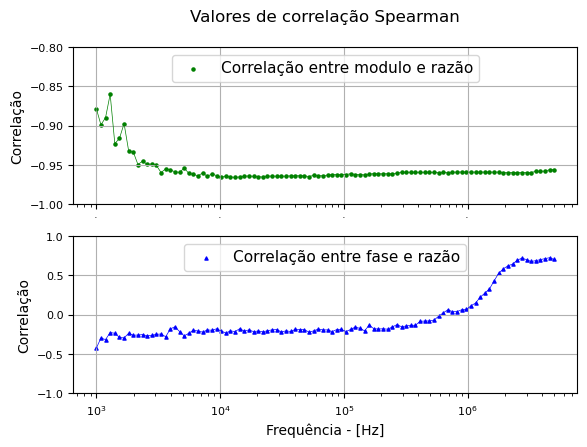

In [14]:
# "Fase - [°]",
# Modulo - [Ω]

plt.figure(figsize=(SizeX, SizeY))
#==============#==============
#==============#==============
plt.rcParams['xtick.labelsize'] = 0
plt.rcParams['ytick.labelsize'] = SizeEixo

plt.subplot(2, 1, 1)
plt.title("Valores de correlação Spearman\n",size=SizeTitulo)
plt.ylabel("Correlação",size=SizeLegenda)

plt.ylim(-1, -0.8)


list(Freq),list(Cor_F)
#plt.plot(df.iloc[:,0],df.iloc[:,2],color='green',linewidth=Eline )
#plt.scatter(df.iloc[:,0],df.iloc[:,2],label='Correlação entre modulo e razão',marker='o',s=SizeMarcador ,color='green')
plt.plot(list(Freq),list(Cor_M),color='green',linewidth=Eline )
plt.scatter(list(Freq),list(Cor_M),label='Correlação entre modulo e razão',marker='o',s=SizeMarcador ,color='green')


plt.xscale("log") 
#plt.yscale("log") 
plt.legend(loc='upper center')
plt.rc('legend', fontsize = 11) 
plt.grid(True)
#==============
#==============

plt.rcParams['xtick.labelsize'] = SizeEixo
plt.rcParams['ytick.labelsize'] = SizeEixo
plt.subplot(2, 1, 2)

plt.ylabel("Correlação", size=SizeLegenda)
plt.xlabel("Frequência - [Hz]",size=SizeLegenda)


# Definir o intervalo do eixo x
plt.ylim(-1, 1)



plt.plot(list(Freq),list(Cor_F),color='blue',linewidth=Eline )
plt.scatter(list(Freq),list(Cor_F),label='Correlação entre fase e razão',marker='^',s=SizeMarcador ,color='blue')
plt.xscale("log") 
#plt.xscale("log") 

#==============#==============
#==============#==============


plt.grid(True)
plt.legend(loc='upper center')
plt.rc('legend', fontsize = 11) 
#plt.tight_layout()
plt.show()